# **Task - 1**

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [78]:


df= pd.read_csv("/content/Admission_Predict.csv",header=1)
df.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [79]:
df.shape

(400, 9)

In [80]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

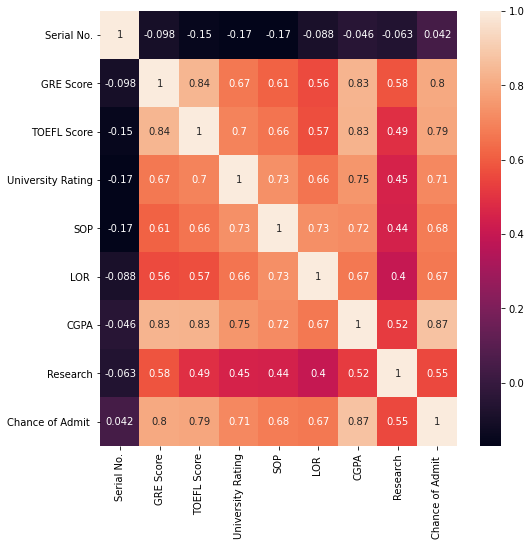

In [81]:
import seaborn as sns
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [82]:
##shuffling data to using sample function
df.sample(frac = 1,random_state=12)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
280,281,311,102,3,4.5,4.0,8.64,1,0.68
387,388,307,105,2,2.0,3.5,8.10,0,0.53
313,314,301,100,3,3.5,3.0,8.04,0,0.67
1,2,324,107,4,4.0,4.5,8.87,1,0.76
35,36,320,110,5,5.0,5.0,9.20,1,0.88
...,...,...,...,...,...,...,...,...,...
241,242,317,103,2,2.5,2.0,8.15,0,0.65
253,254,335,115,4,4.5,4.5,9.68,1,0.93
390,391,314,102,2,2.0,2.5,8.24,0,0.64
155,156,312,109,3,3.0,3.0,8.69,0,0.77


Using threshold =0.5 to convert target to binary values

In [83]:
#input features and target variable are stored in separate variables X and Y

X=df.drop(labels=['Chance of Admit '],axis=1)
Y=df['Chance of Admit ']
# Converting the Y values to binary class values

Y = [1 if(i >= 0.5) else 0 for i in Y]
print(X.shape,len(Y))

(400, 8) 400


In [84]:
#generatng training set size =70%
train_size=int(X.shape[0]*0.7)

train_X=X[:train_size]
train_Y=Y[:train_size]

test_size=X.shape[0]-train_size
test_X=X[train_size:]
test_Y=Y[train_size:]


####1. Feature Normalization

In [85]:
#Normalizing the feature values to standard normal form
train_X=(train_X-train_X.mean())/train_X.std()

test_X=(test_X-test_X.mean())/test_X.std()


## **Using Library function**

In [86]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
m1=LogisticRegression(max_iter=20)
m1.fit(train_X, train_Y)

print("Coefficients: ", m1.coef_)
print("Intercept: ", m1.intercept_)

Y_pred=m1.predict(test_X)
print("MSE: ", mean_squared_error(test_Y, Y_pred))

Coefficients:  [[ 0.94768218  0.8181919   1.01322784 -0.35879569 -0.46152698  0.58150815
   1.18798727  0.17025963]]
Intercept:  [4.95862962]
MSE:  0.06666666666666667


In [89]:
accur = (Y_pred == test_Y).sum()  # count of correctly classified Y values
print("Accuracy using sklearn library: ", accur*100/len(test_Y), "%" )

Accuracy using sklearn library:  93.33333333333333 %


##**Solution using Gradient Descent**

In [90]:
#Gradient descent Model built by using features as vectors
#so can be used for varying number of features i.e for both simple and multiple case it works
def sigmoid(scores):
  return 1 / (1 + np.exp(-scores))
class gradient_descent:

  def fit_to_grad(self,input_data, labels, learning_rate,epochs):
    m = input_data.shape[0]
    k=input_data.shape[1]
    n=epochs
    initial_params=np.array([0.0]*(k+1))
    thetas=np.array(initial_params).reshape(k+1,1)
    labels=np.array(labels).reshape(m,1)
    ones=np.array([1]*m).reshape(m,1)
    input_data=np.array(input_data).reshape(m,k)
    X1=np.append(ones,input_data,axis=1)
    ct=1
    for i in range(n):
        predicted_y = np.dot(X1,thetas)
        sig_error=labels-sigmoid(predicted_y)
        gradient=np.dot(X1.T,sig_error)
        new_thetas=thetas+(gradient*learning_rate/(m))
        thetas=new_thetas
    #print(thetas)
    self.thetas=thetas
    return self.thetas

  def predict(self,input_data):
    m=input_data.shape[0]
    n=input_data.shape[1]
    ones=np.array([1]*m).reshape(m,1)
    input_data=np.array(input_data).reshape(m,n)
    X1=np.append(ones,input_data,axis=1)
    
    predicted_y = np.dot(X1,self.thetas)
    ## returns the binary class values
    predicted_y=[1 if(i >= 0.5) else 0 for i in predicted_y]
    return predicted_y 


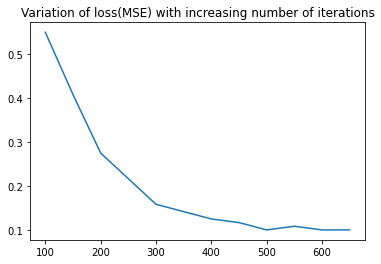

In [91]:
learning_rate=0.01
itrs=range(100,700,50)
itrs_loss=[]

plt.title("Variation of loss(MSE) with increasing number of iterations")
for k in itrs:
  grad_model=gradient_descent()
  grad_model.fit_to_grad(train_X, train_Y,learning_rate,k)
  y_pred=grad_model.predict(test_X)
  itrs_loss.append(mean_squared_error(y_pred,test_Y))
plt.plot(itrs,itrs_loss)
plt.show()

In [ ]:
#using learning rate of 0.01 and no of iterations=500 

In [98]:
grad_model=gradient_descent()
grad_model.fit_to_grad(train_X, train_Y,0.01,500)

print("\nCoefficients \n ",grad_model.thetas[:])

y_pred=grad_model.predict(test_X)
#calculating MSE by loss function
print("Mean squared Error obtained:\n",mean_squared_error(y_pred,test_Y))


Coefficients 
  [[ 1.27827772]
 [ 0.18954065]
 [ 0.15743253]
 [ 0.1548116 ]
 [ 0.02244059]
 [-0.01743375]
 [ 0.11020858]
 [ 0.1961261 ]
 [ 0.01420164]]
Mean squared Error obtained:
 0.1


In [99]:
accur = (np.array(y_pred) == test_Y).sum()  # count of correctly classified Y values
print("Accuracy using sklearn library: ", accur*100/len(test_Y), "%" )

Accuracy using sklearn library:  90.0 %


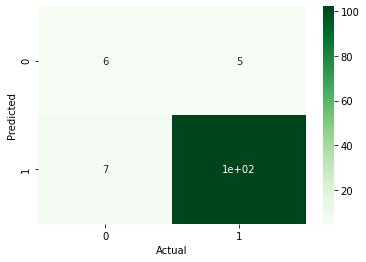

Precision:  0.9532710280373832
Recall:  0.9357798165137615
F1 score:  0.9444444444444445


In [100]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from mlxtend.plotting import plot_confusion_matrix
 
conf_matrix = confusion_matrix(test_Y, y_pred)

sns.heatmap(conf_matrix,annot=True,cmap='Greens')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()
print("Precision: ", precision_score(test_Y, y_pred))
print("Recall: ", recall_score(test_Y, y_pred))
print("F1 score: ", f1_score(test_Y, y_pred))

# **Task - 2**

In [122]:
# Read csv file
df2 = pd.read_csv("/content/heart.csv",sep='\t',header=1)
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [123]:
df2.shape

(303, 14)

In [124]:
df2.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

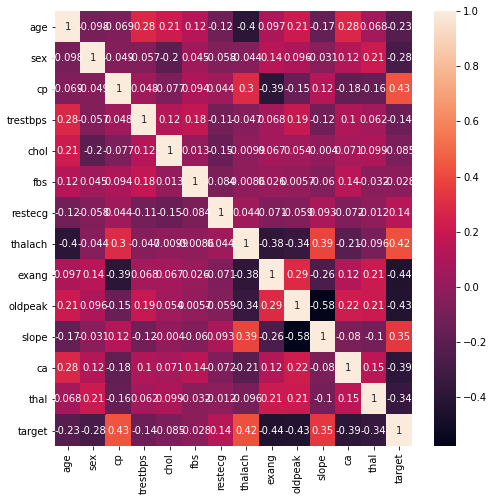

In [125]:
import seaborn as sns
plt.figure(figsize=(8,8))
sns.heatmap(df2.corr(),annot=True)
plt.show()

In [128]:
#input features and target variable are stored in separate variables X and Y

X=df2.drop(labels=['target'],axis=1)
Y=df2['target']
# Converting the Y values to binary class values


print(X.shape,len(Y))

(303, 13) 303


In [129]:
#generatng training set size =70%
train_size=int(X.shape[0]*0.7)

train_X=X[:train_size]
train_Y=Y[:train_size]

test_size=X.shape[0]-train_size
test_X=X[train_size:]
test_Y=Y[train_size:]


In [130]:
#Normalizing the feature values to standard normal form
train_X=(train_X-train_X.mean())/train_X.std()

test_X=(test_X-test_X.mean())/test_X.std()


## **Using Library function**

In [137]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
m2=LogisticRegression(C=500)
m2.fit(train_X, train_Y)

print("Coefficients: ", m2.coef_)
print("Intercept: ", m2.intercept_)

Y_pred=m2.predict(test_X)
print("MSE: ", mean_squared_error(test_Y, Y_pred))

Coefficients:  [[-0.11662036 -1.0505168   1.20797401 -0.04353218 -0.22997393  0.03727412
   0.73588606 -0.0642142  -0.37717178 -0.86926054  0.33592781 -0.75227755
  -0.6357853 ]]
Intercept:  [2.46571333]
MSE:  0.8021978021978022


In [133]:
accur = (Y_pred == test_Y).sum()  # count of correctly classified Y values
print("Accuracy using sklearn library: ", accur*100/len(test_Y), "%" )

Accuracy using sklearn library:  82.5566%


##**Solution using Gradient Descent**

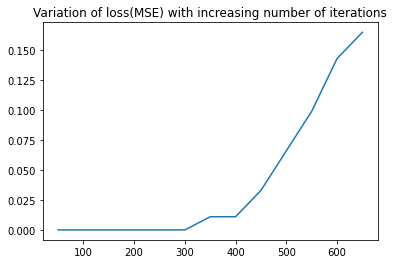

In [155]:
learning_rate=0.001
itrs=range(50,700,50)
itrs_loss=[]

plt.title("Variation of loss(MSE) with increasing number of iterations")
for k in itrs:
  grad_model=gradient_descent()
  grad_model.fit_to_grad(train_X, train_Y,learning_rate,k)
  y_pred=grad_model.predict(test_X)
  itrs_loss.append(mean_squared_error(y_pred,test_Y))
plt.plot(itrs,itrs_loss)
plt.show()

In [159]:
grad_model=gradient_descent()
grad_model.fit_to_grad(train_X, train_Y,0.01,100)

print("\nCoefficients \n ",grad_model.thetas[:])

y_pred=grad_model.predict(test_X)
#calculating MSE by loss function
print("Mean squared Error obtained:\n",mean_squared_error(y_pred,test_Y))


Coefficients 
  [[ 0.2469529 ]
 [-0.05145135]
 [-0.08845179]
 [ 0.12665752]
 [-0.01671543]
 [-0.00527628]
 [ 0.01465908]
 [ 0.0723476 ]
 [ 0.09035337]
 [-0.11405078]
 [-0.14341073]
 [ 0.08837311]
 [-0.1089855 ]
 [-0.13639031]]
Mean squared Error obtained:
 0.2857142857142857


In [160]:
accur = (np.array(y_pred) == test_Y).sum()  # count of correctly classified Y values
print("Accuracy using sklearn library: ", accur*100/len(test_Y), "%" )

Accuracy using sklearn library:  71.42857142857143 %


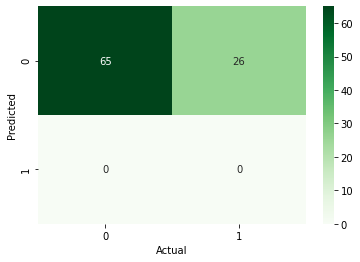

Precision:  0.0
Recall:  0.0
F1 score:  0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [161]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from mlxtend.plotting import plot_confusion_matrix
 
conf_matrix = confusion_matrix(test_Y, y_pred)

sns.heatmap(conf_matrix,annot=True,cmap='Greens')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()
print("Precision: ", precision_score(test_Y, y_pred))
print("Recall: ", recall_score(test_Y, y_pred))
print("F1 score: ", f1_score(test_Y, y_pred))